# Covid-19 tests in Ontario
We first load in the required libraries and our dataset according to the requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_df = pd.read_csv("covid_train.csv", header=0)
covid_df.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


## Data Preprocessing
Before we create our pairplots, we have to perform preliminary preprocessing for the dataset to be easier to work with movinf forward

In [3]:
covid_df.dtypes

Age_Group                   object
Client_Gender               object
Case_AcquisitionInfo        object
Reporting_PHU_City          object
Outbreak_Related            object
Reporting_PHU_Latitude     float64
Reporting_PHU_Longitude    float64
Outcome1                    object
dtype: object

We need to do the following
- rename the columns for easier analysis
- convert "Age_Group" into ordinal data, preferrably with int64 datatype
- convert "Client_Gender" into categorical datatype
- convert "Reporting_PHU_city" into categorical datatype
- convert "Outbreak_related" into categorical datatype and replace `NaN` with No
- convert "Outcome1" categorical datatype

In [4]:
covid_df.columns = ["Age", "Gender", "CAInfo", "City", "Outbreak", "Latitude", "Longitude", "Outcome1"]
covid_df.head()

,Age,Gender,CAInfo,City,Outbreak,Latitude,Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


In [5]:
covid_df["Age"].unique()

array(['50s', '20s', '90s', '60s', '70s', '30s', '80s', '<20', '40s', nan],
      dtype=object)

In [6]:
covid_df["Age"] = covid_df["Age"].replace({'50s':5, '20s':2, '90s':9, '60s':6, '70s':7, '30s':3, '80s':8, '<20':1, '40s':4})
covid_df["Age"].unique()

array([ 5.,  2.,  9.,  6.,  7.,  3.,  8.,  1.,  4., nan])

In [7]:
covid_df["Gender"] = covid_df["Gender"].astype("category")
covid_df["City"] = covid_df["City"].astype("category")
covid_df["CAInfo"] = covid_df["CAInfo"].astype("category")
covid_df["Outcome1"] = covid_df["Outcome1"].astype("category")
covid_df.dtypes

Age           float64
Gender       category
CAInfo       category
City         category
Outbreak       object
Latitude      float64
Longitude     float64
Outcome1     category
dtype: object

Our "Age" column data is float64 as they have NaN values

In [8]:
covid_df["Outbreak"] = covid_df["Outbreak"].fillna("No")
covid_df["Outbreak"].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
covid_df["Outbreak"] = covid_df["Outbreak"].astype("category")
covid_df.dtypes

Age           float64
Gender       category
CAInfo       category
City         category
Outbreak     category
Latitude      float64
Longitude     float64
Outcome1     category
dtype: object

Now, we will look at the missing values in our dataset

In [10]:
covid_df.isna().sum()

Age          6
Gender       0
CAInfo       0
City         0
Outbreak     0
Latitude     0
Longitude    0
Outcome1     0
dtype: int64

We will drop the rows with missing values.

In [11]:
covid_df.dropna(inplace=True)
covid_df.isna().sum()

Age          0
Gender       0
CAInfo       0
City         0
Outbreak     0
Latitude     0
Longitude    0
Outcome1     0
dtype: int64

## Data Visualization
Now, we plot.

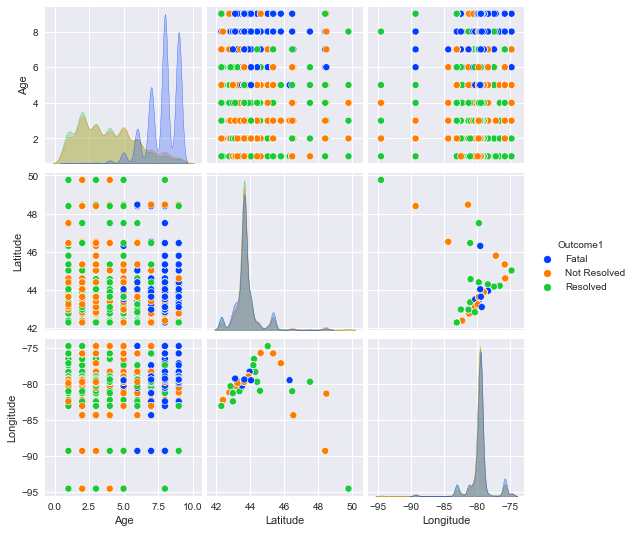

In [12]:
plt.style.use('seaborn')
sns.pairplot(covid_df, hue="Outcome1", palette="bright")

The most important thing the above plot shows that none of the features can be individually used for classification, as seen by the univariate distributions.  
Since most of our data is categorical, it doesn't show up in the pairplots. Instead, we will graph individual count plots below for all of our categorical columns.

Text(0.5, 1.0, 'Outbreak related')

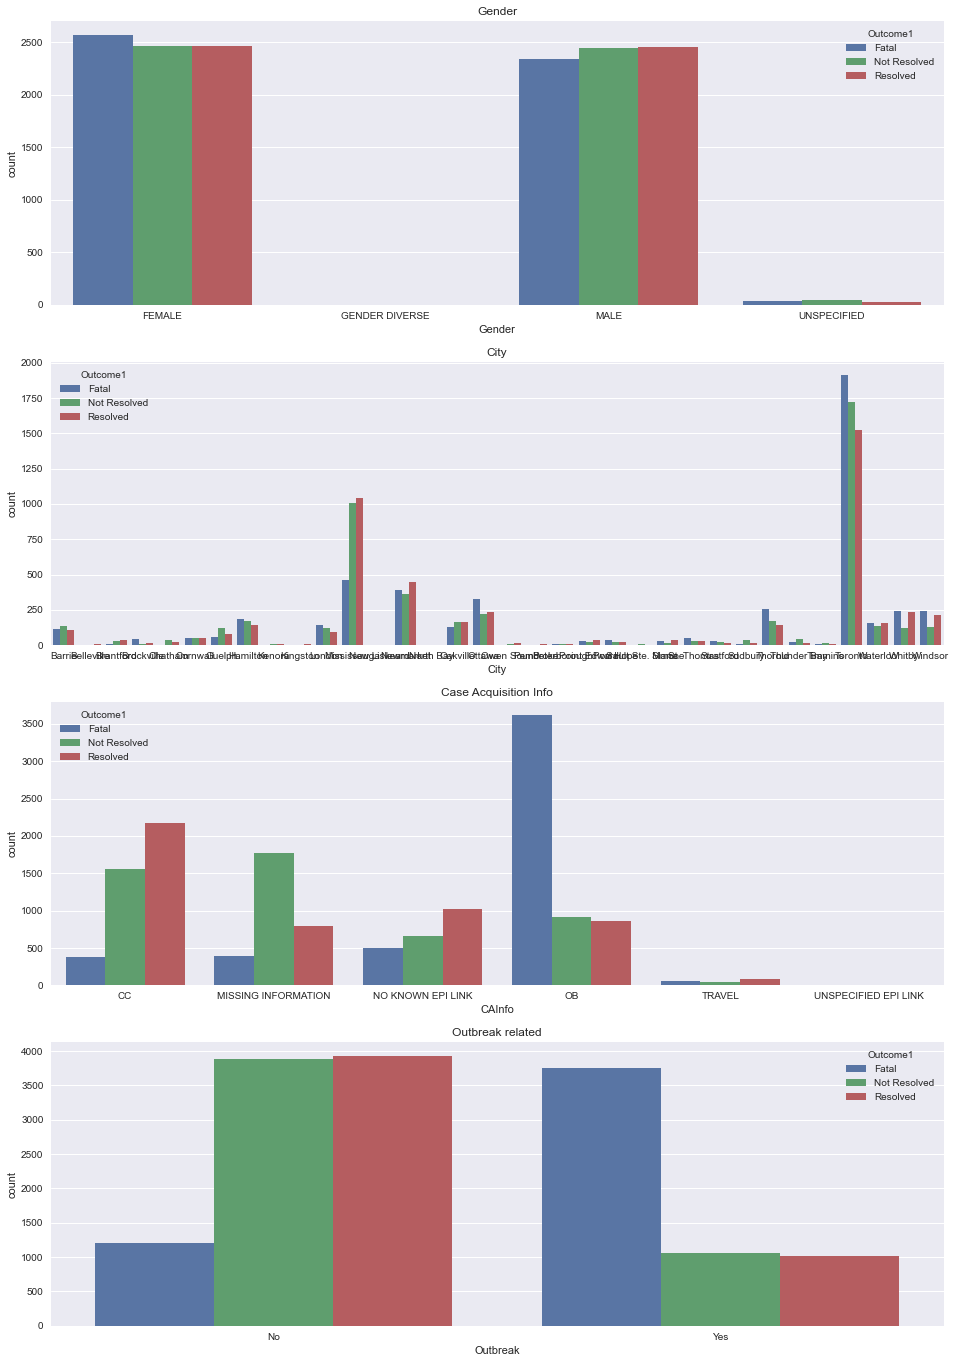

In [13]:
fig,(a1, a2, a3, a4) = plt.subplots(4,1, figsize=(16,24))

sns.countplot(ax=a1, x=covid_df["Gender"], hue=covid_df["Outcome1"])
a1.set_title("Gender")
sns.countplot(ax=a2, x=covid_df["City"], hue=covid_df["Outcome1"])
a2.set_title("City")
sns.countplot(ax=a3, x=covid_df["CAInfo"], hue=covid_df["Outcome1"])
a3.set_title("Case Acquisition Info")
sns.countplot(ax=a4, x=covid_df["Outbreak"], hue=covid_df["Outcome1"])
a4.set_title("Outbreak related")

From our above plots, we can come to the initial comclusion that
- the "outcome" seems evenly distributed for all genders
- "cainfo" shows that most "fatal" cases are outbreak related, reinforced by our observations in "outbreak" plot
- the most "resolved" cases are from close contact, as seen in the "cainfo" plot

**Now, we try to fnd outliers in our data.**

In [14]:
covid_df.describe()

,Age,Latitude,Longitude
count,14845.000000,14845.000000,14845.000000
mean,5.169889,43.741602,-79.564449
std,2.615270,0.752457,1.589351
min,1.000000,42.308796,-94.488254
25%,3.000000,43.647471,-79.708893
50%,5.000000,43.656591,-79.379358
75%,8.000000,43.656591,-79.379358
max,9.000000,49.769615,-74.736298


In [15]:
print(covid_df["Gender"].value_counts())
print(covid_df["City"].value_counts())
print(covid_df["CAInfo"].value_counts())
print(covid_df["Outbreak"].value_counts())

FEMALE            7496
MALE              7243
UNSPECIFIED        104
GENDER DIVERSE       2
Name: Gender, dtype: int64
Toronto             5158
Mississauga         2516
Newmarket           1193
Ottawa               789
Whitby               598
Windsor              581
Thorold              567
Hamilton             505
Oakville             456
Waterloo             450
London               361
Barrie               361
Guelph               259
Cornwall             152
St. Thomas           111
Point Edward          83
Simcoe                81
Thunder Bay           81
Port Hope             78
Stratford             70
Brantford             70
Brockville            61
Chatham               60
Sudbury               53
Timmins               32
Peterborough          28
Owen Sound            23
Belleville            14
Kingston              13
Kenora                11
Pembroke               9
Sault Ste. Marie       8
North Bay              7
New Liskeard           6
Name: City, dtype: int64
OB    

According to the column desciptions given in the data dictionary on the Ontario state Data Catalogue for Covid-19 cases [1], all our above obtained values are valid. Hence, we do not have any observable outliers.  
Let us plot histograms for our numeric data.

Text(0.5, 1.0, 'Longitude')

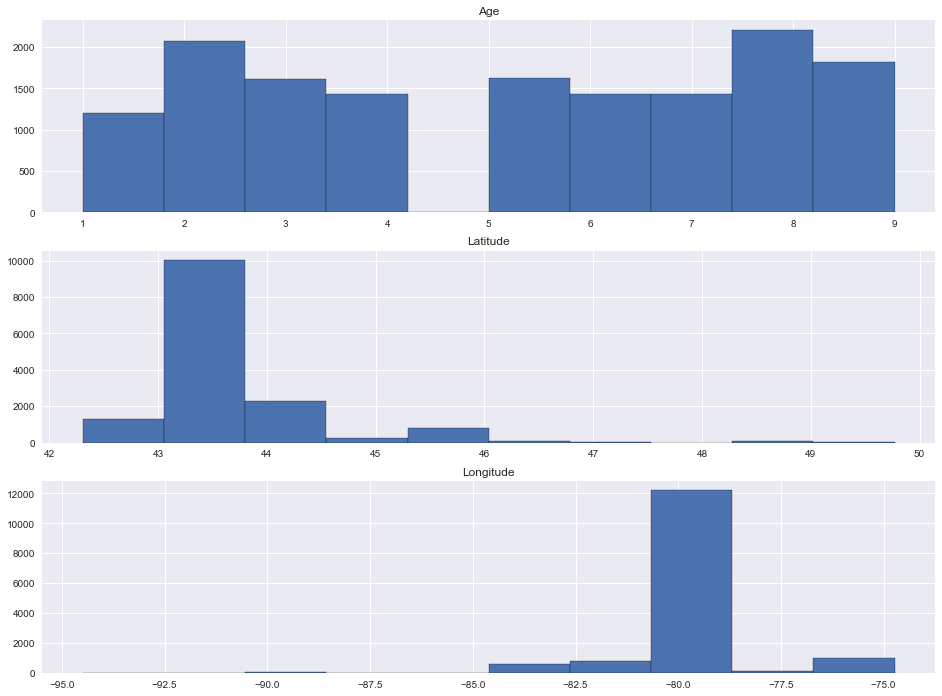

In [16]:
fig2, (b1, b2, b3) = plt.subplots(3,1,figsize=(16,12))
b1.hist(covid_df["Age"], edgecolor="black")
b1.set_title("Age")
b2.hist(covid_df["Latitude"], edgecolor="black")
b2.set_title("Latitude")
b3.hist(covid_df["Longitude"], edgecolor="black")
b3.set_title("Longitude")

Thus, we do not have any outliers in our data as "Age" is according to the labels we have defined and both "Latitude" as well as "Longitude" are within expected values, as verified from Ontario's wikipedia page [2].

#### NOTE about OUTLIER REMOVAL:
We may be consider removing values with very low frequency in any particular column. For example, `UNSPECIFIED` in the "Age" column only occurs 4 times in a total of 15000 samples, and many cities occur in less than 10% of the total samples. However, I am choosing not to because these values are considered valid according to the methodology used for data collection and may still be present in our test dataset. This might make the models we build in the next sections more complex and less interpretable but covering all possible inputs should be a bigger priority for this topic/field, even if it takes longer to build or more difficult to explain effectively.

#### Further ENCODING:
Due to the limitations of Scikit-Learn, categorical data cannot be passed to Tree functions despite Tree methods theoritically excelling at working with categorical data due to the nature of their algorithm. Unfortunately, I came to know about this limitation after my data cleaning was done, so one-hot encoding for all categorical columns will be done in the next step using the `get_dummies()` function in *pandas* library. In hindsight, the process of handling missing data and finding outliers was easier and more understandable without encoding rules.

In [34]:
pd.get_dummies(covid_df[["Gender", "CAInfo", "City", "Outbreak"]]).head()

,Gender_FEMALE,Gender_GENDER DIVERSE,Gender_MALE,Gender_UNSPECIFIED,CAInfo_CC,CAInfo_MISSING INFORMATION,CAInfo_NO KNOWN EPI LINK,CAInfo_OB,CAInfo_TRAVEL,CAInfo_UNSPECIFIED EPI LINK,...,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor,Outbreak_No,Outbreak_Yes
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
part_df = pd.get_dummies(covid_df[["Gender", "CAInfo", "City", "Outbreak"]])
new_df = covid_df[["Age", "Latitude", "Longitude", "Outcome1"]].join(part_df)
new_df.head()

,Age,Latitude,Longitude,Outcome1,Gender_FEMALE,Gender_GENDER DIVERSE,Gender_MALE,Gender_UNSPECIFIED,CAInfo_CC,CAInfo_MISSING INFORMATION,...,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor,Outbreak_No,Outbreak_Yes
0,5.0,43.413997,-79.744796,Resolved,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,43.524881,-80.233743,Not Resolved,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,9.0,44.410713,-79.686306,Resolved,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,43.656591,-79.379358,Resolved,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,9.0,45.345665,-75.763912,Fatal,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
new_df.shape

(14845, 50)

In [39]:
new_df.dtypes

Age                             float64
Latitude                        float64
Longitude                       float64
Outcome1                       category
Gender_FEMALE                     uint8
Gender_GENDER DIVERSE             uint8
Gender_MALE                       uint8
Gender_UNSPECIFIED                uint8
CAInfo_CC                         uint8
CAInfo_MISSING INFORMATION        uint8
CAInfo_NO KNOWN EPI LINK          uint8
CAInfo_OB                         uint8
CAInfo_TRAVEL                     uint8
CAInfo_UNSPECIFIED EPI LINK       uint8
City_Barrie                       uint8
City_Belleville                   uint8
City_Brantford                    uint8
City_Brockville                   uint8
City_Chatham                      uint8
City_Cornwall                     uint8
City_Guelph                       uint8
City_Hamilton                     uint8
City_Kenora                       uint8
City_Kingston                     uint8
City_London                       uint8


In [44]:
for col in new_df:
    print(col)
    print(new_df[col].unique())

Age
[5. 2. 9. 6. 7. 3. 8. 1. 4.]
Latitude
[43.41399692 43.5248813  44.41071258 43.65659125 45.3456651  44.048023
 43.1165366  43.898605   42.3087965  43.46287573 43.6474713  47.5092835
 42.84782526 43.2576311  48.4005716  42.98146842 42.98641646 42.77780366
 44.2278735  45.02915233 43.96817279 46.31320706 43.3686615  44.57619612
 43.151811   42.403861   44.61584261 48.47251    49.76961482 46.46609195
 44.18667362 44.30163229 46.5323728  45.799406  ]
Longitude
[-79.74479581 -80.2337433  -79.68630597 -79.37935801 -75.7639122
 -79.480239   -79.2412197  -78.940341   -83.0336705  -80.52091315
 -79.7088933  -79.681632   -80.30381491 -79.87134089 -89.2588508
 -81.25401572 -82.40480836 -81.15115646 -76.5252108  -74.73629779
 -78.28579239 -79.4678405  -81.00191283 -80.94097993 -80.27437415
 -82.208561   -75.70283308 -81.32875    -94.48825435 -80.99805884
 -77.39144554 -78.32134748 -84.3148358  -77.118727  ]
Outcome1
['Resolved', 'Not Resolved', 'Fatal']
Categories (3, object): ['Resolved', 'Not

**Hence, we have one-hot encoded all our categorical variables with and label encoded our ordinal variable.**

#### NOTE about PREPROCESSING:
In most machine learning algorithms, one of the fundamental steps in data exploration and analysis is data preprocessing with regards to normalization and data reduction by primarily feature selection. We choose to skip these steps for the following reasons-
- **Normalization** = Tree methods by nature of their algorithm are unaffected by the type of data or the scale of the data involved [3]. This is due to simple fact that the formation of each split is done by choosing a feature and finding a split point within that feature's data using a predefined metric like Gini Index. The scale of another feature will not have any effect on the splitpoint chosen for another feature. Since the very essence of any Tree method is its splitpoints, we can safely assume that normalization will have zero effect on our model performance.  

- **Feature Selection** = The main reasons for feature selection is to reduce total amount of data for faster model building, and for removing redundant dimensions that unnecessarily complicates our model which having a significant contribution to our response variable. Despite the notion that Tree methods (especially Random Forests and Gradient Boosting) are computationally harder to run when compared to other traditional machine learning algorithms like regression, they are still comfortably fast today due to the advances in computing power of modern hardware. So, we can ignore the first reason stated. With regards to the second reason i.e. redundancy, Tree methods by nature of their algorithm perform a form of feature selection when choosing a feature for a splitpoint [4]. It is usually based on a predefined metric like Gini Index which ensures that only the feature that has the most significant effect on the response is chosen for our split, thereby eliminating a need for manual or mathematical-based feature selection. Also, we have a lot of features (50) in our dataset due to one-hot encoding but the number is still very little compared to the number of samples (14845) we have. With `p << n`, the curse of dimensionality is not present.

#### References-
[1] https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario  
[2] https://en.wikipedia.org/wiki/Ontario  
[3] https://datascience.stackexchange.com/questions/5277/do-you-have-to-normalize-data-when-building-decision-trees-using-r  
[4] https://datascience.stackexchange.com/questions/51615/does-feature-selections-matter-to-decision-tree-algorithms

# Tree-based Classifiers and Ensembles

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

We now split our dataset into training set and test set.

In [46]:
X = new_df[ new_df.columns.difference(["Outcome1"], sort=False)]
y = new_df["Outcome1"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Decision Tree

In [49]:
dectree = DecisionTreeClassifier(random_state=0)
dtparam = {"max_depth":[3,5,10,None]} 
dtcv = GridSearchCV(dectree, param_grid=dtparam, cv=10, scoring='accuracy')
dtcv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 10, None]}, scoring='accuracy')

In [50]:
dtcv.cv_results_

{'mean_fit_time': array([0.045964  , 0.03593016, 0.04530334, 0.05155005]),
 'std_fit_time': array([0.04960423, 0.00715983, 0.00468336, 0.00715939]),
 'mean_score_time': array([0.12465818, 0.00468514, 0.00156128, 0.00624871]),
 'std_score_time': array([0.36362111, 0.00715667, 0.00468385, 0.00765308]),
 'param_max_depth': masked_array(data=[3, 5, 10, None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': None}],
 'split0_test_score': array([0.65909091, 0.66414141, 0.66245791, 0.64646465]),
 'split1_test_score': array([0.61952862, 0.62710438, 0.62962963, 0.62289562]),
 'split2_test_score': array([0.64309764, 0.6506734 , 0.64983165, 0.64309764]),
 'split3_test_score': array([0.6489899 , 0.64983165, 0.64814815, 0.65319865]),
 'split4_test_score': array([0.63888889, 0.64141414, 0.64309764, 0.62962963]),
 'split5_test_score': array([0.66666667, 0.67508418

In [51]:
dtcv.best_params_

{'max_depth': 10}

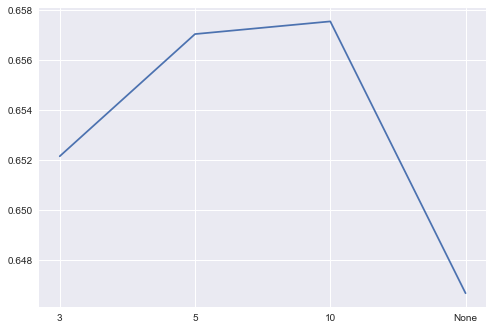

In [53]:
dtcvacc = dtcv.cv_results_["mean_test_score"]
dtmd = ["3", "5", "10", "None"]

plt.plot(dtmd, dtcvacc)

**We obtain the highest accuracy of approx. 0.658 when the decision tree is limited to a maximum depth of 10.** It also important to not that letting the tree gtow until pure leaves i.e. `max_depth=None` gives us the worst accuracy.  
Now, we visualise our tree

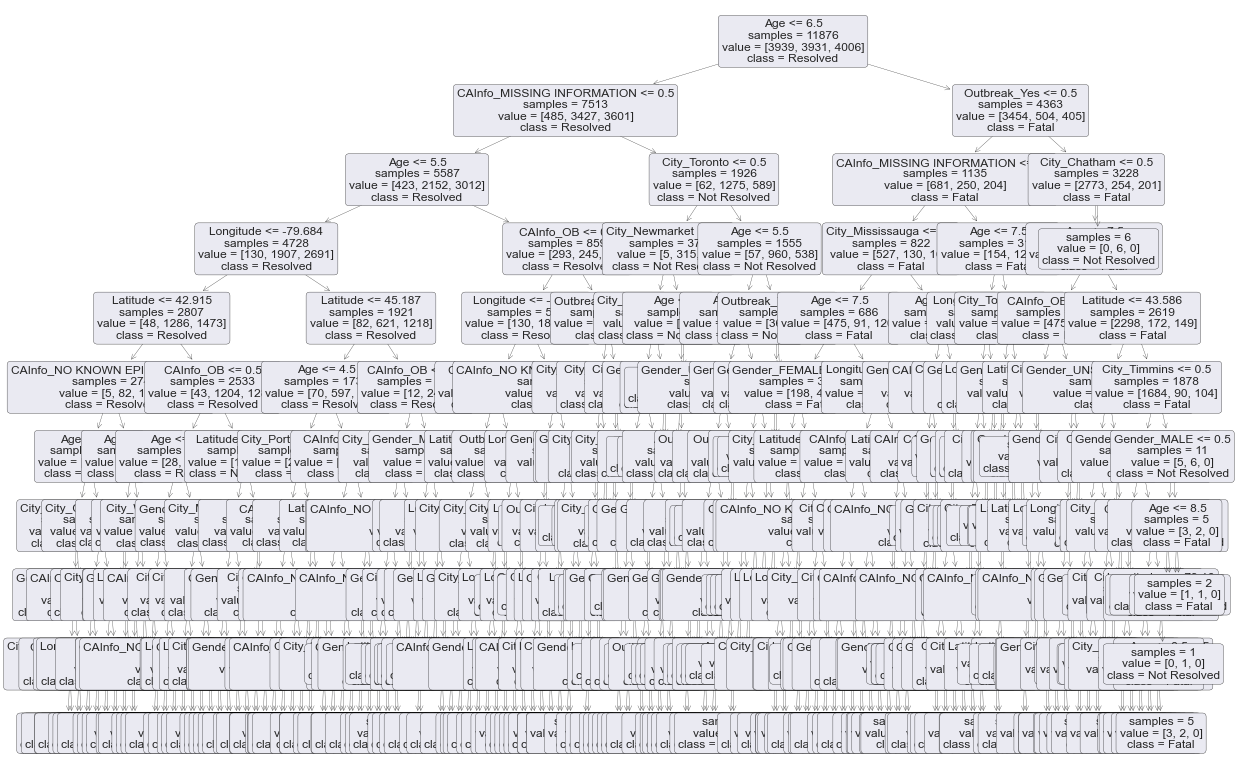

In [69]:
from sklearn import tree

plt.figure(figsize = (20,14))

best_dt = dtcv.best_estimator_
tree.plot_tree(best_dt, rounded=True, fontsize=12, impurity=False, feature_names=X.columns, 
               class_names=['Fatal', 'Not Resolved', 'Resolved'])
plt.show()

Due to a large number of features in our dataset, our tree is impossible to read from the above visualization. So, we will instead obtain it as text file as well as save the above as an image file for our evaluation.

In [70]:
from sklearn.tree import export_text

print(export_text(best_dt, feature_names=list(X.columns), show_weights=True))

|--- Age <= 6.50
|   |--- CAInfo_MISSING INFORMATION <= 0.50
|   |   |--- Age <= 5.50
|   |   |   |--- Longitude <= -79.68
|   |   |   |   |--- Latitude <= 42.91
|   |   |   |   |   |--- CAInfo_NO KNOWN EPI LINK <= 0.50
|   |   |   |   |   |   |--- Age <= 1.50
|   |   |   |   |   |   |   |--- City_Chatham <= 0.50
|   |   |   |   |   |   |   |   |--- Gender_MALE <= 0.50
|   |   |   |   |   |   |   |   |   |--- City_St. Thomas <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 6.00, 7.00] class: Resolved
|   |   |   |   |   |   |   |   |   |--- City_St. Thomas >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: Resolved
|   |   |   |   |   |   |   |   |--- Gender_MALE >  0.50
|   |   |   |   |   |   |   |   |   |--- CAInfo_CC <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: Not Resolved
|   |   |   |   |   |   |   |   |   |--- CAInfo_CC >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights

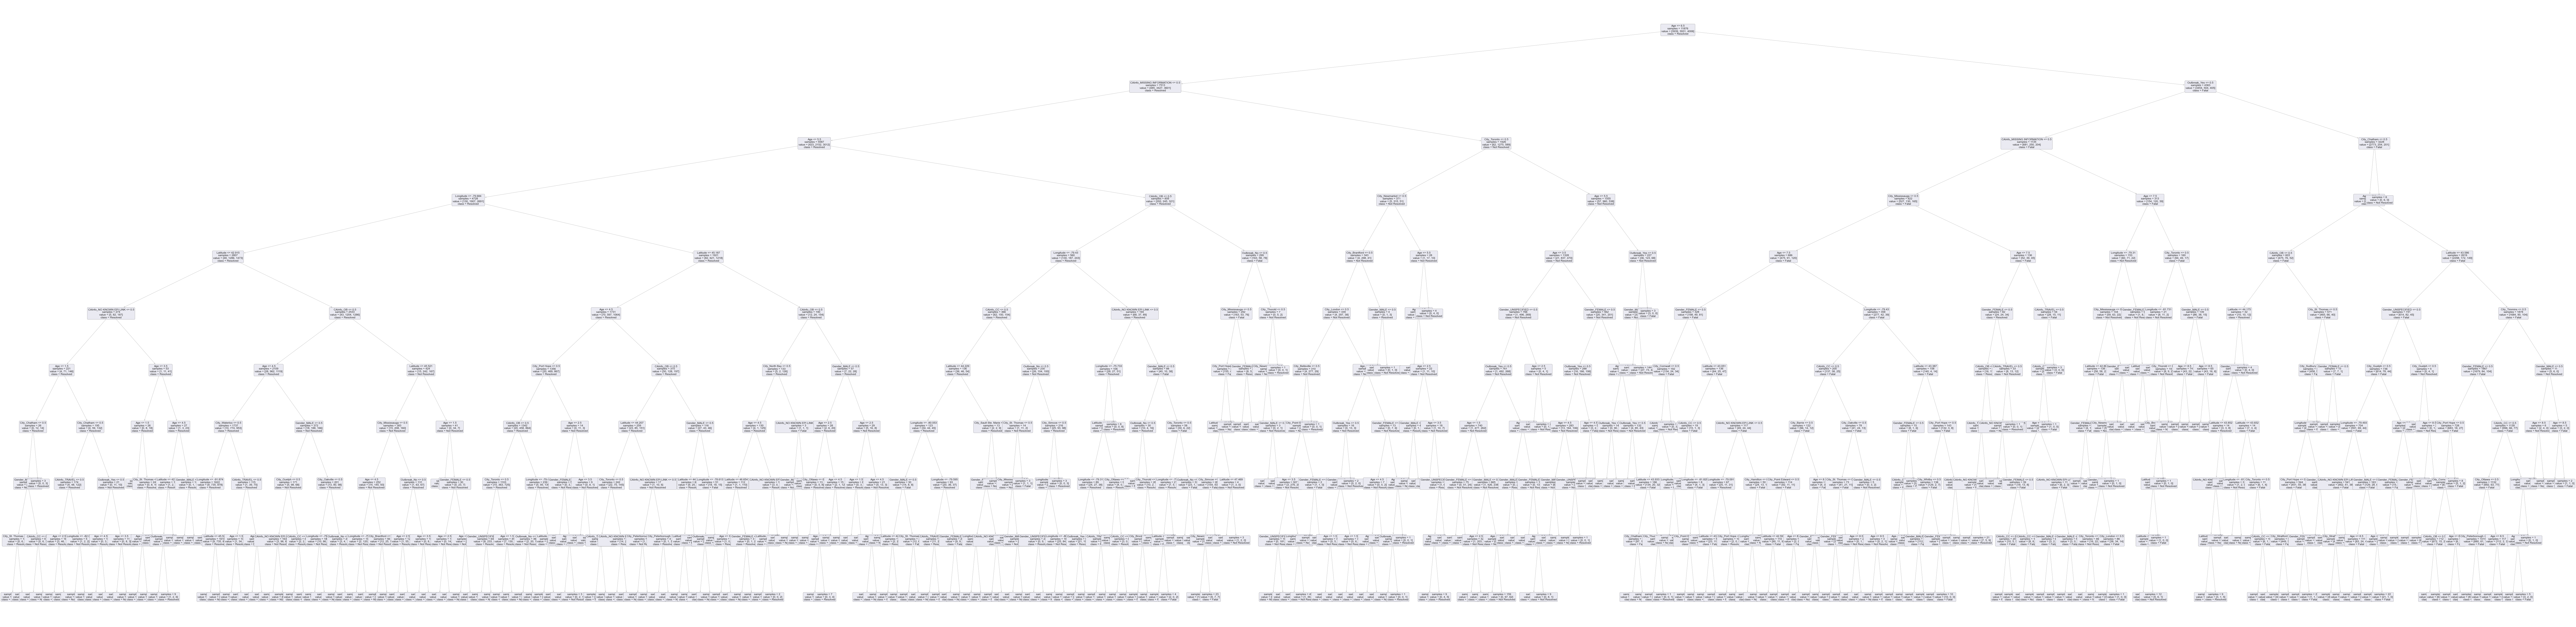

In [71]:
plt.figure(figsize = (200,50))

tree.plot_tree(best_dt, rounded=True, fontsize=12, impurity=False, feature_names=X.columns, 
               class_names=['Fatal', 'Not Resolved', 'Resolved'])
plt.savefig("covid dtree.jpeg")

From the splitting rules, we can make the following observations:  
- Most of our leaves are impure
- Ages 70s and above have a higher number of "Fatal" whereas those younger have a higher chance of being either "Resolved" or "Not resolved".
- Cities do not show up as an attribute until a minimun depth of 6, giving us an insight of what made `max_depth=10` slightly better that `max_depth=5'
- Age, case acquisition information and outbreak link seem to be the main factors that broadly classify our data
- While "Resolved" and "Fatal" can be prematurely classified with reasonable accuracy in the first few splits in our data, "Not Resolved" cases require more splits as well as features for reasonable premature classification,
- Without looking at other features, a patient in his 70s or older whose case is linked to an outbreak can be classified as "Fatal" with reasonable amount of accuracy.
- Without looking at any other features, a patient in his 50s or younger whose case acquisition information is not missing and lives west of longitude -79.684 can be classified as "Resolved" with reasonable amount of accuracy.
- As expected, interpretability is extremely low for our Decision Tree due to the use of one-hot encoding as a result of limitations in the Scikit-learn library in handling categorical data.

We now calculate the accuracy of our chosen decision tree with our test data

In [72]:
dt_acc = best_dt.score(X_test, y_test)
dt_acc

0.6672280229033345

### Random Forests

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
randfor = RandomForestClassifier(random_state=0)
rfparam = {"n_estimators":[5,10,50,150,200], "max_depth":[3,5,10,None]}
rfcv = GridSearchCV(randfor, param_grid=rfparam, cv=10, scoring="accuracy")
rfcv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             scoring='accuracy')

In [75]:
rfcv.cv_results_

{'mean_fit_time': array([0.08084669, 0.12851911, 0.38080943, 1.07753413, 1.43027444,
        0.10480392, 0.13463354, 0.46982026, 1.34155798, 1.75865955,
        0.10490832, 0.16321187, 0.65959568, 1.90007405, 2.52502334,
        0.13317924, 0.22308774, 0.96401415, 2.90082312, 3.75365694]),
 'std_fit_time': array([0.00471487, 0.02597535, 0.01659811, 0.01365094, 0.01225465,
        0.01178107, 0.01627888, 0.01516872, 0.0414863 , 0.01744435,
        0.00600331, 0.00632618, 0.00552411, 0.02039119, 0.01575905,
        0.00722901, 0.0044208 , 0.01091253, 0.12023297, 0.03183166]),
 'mean_score_time': array([0.00803599, 0.01094065, 0.02865589, 0.06357284, 0.07830932,
        0.01405778, 0.0109257 , 0.02866004, 0.06427941, 0.0865104 ,
        0.00937686, 0.01437643, 0.03188791, 0.08654842, 0.1097578 ,
        0.01431282, 0.01574042, 0.04303615, 0.11088407, 0.13875244]),
 'std_score_time': array([0.00784888, 0.00565205, 0.00575307, 0.00119966, 0.00748983,
        0.00468604, 0.00715257, 0.006514

In [76]:
rfcv.best_params_

{'max_depth': 10, 'n_estimators': 200}

We plot the accuracies in the form of a heatmap

<AxesSubplot:>

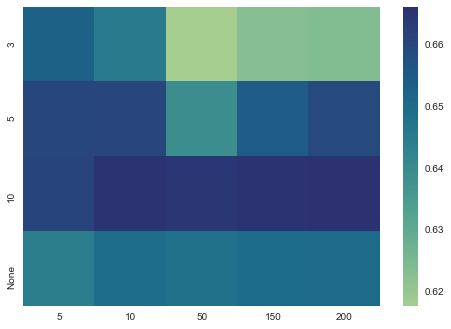

In [78]:
rfcvacc = rfcv.cv_results_["mean_test_score"]
rfcvacc_arr = np.reshape(rfcvacc, (4,5))
rfnt = [5,10,50,150,200]
rfmd = ["3","5","10","None"]

rfheat_df = pd.DataFrame(data=rfcvacc_arr, index=rfmd, columns=rfnt)
sns.heatmap(rfheat_df, cmap="crest")

**As seen above, we obtain the highest accuracy of 0.666 when the maximum depth is 10 with the 200 trees in the forest.**  
It is important to note that the accuracies for `max_depth=10` irrespective of the number of trees grown is high. As seen, 200 trees beat out 10 and 150 by a very small margin. The computational time between 150 and 200 trees is small but between 10 and 200 trees is quite large, nearly 2 seconds more for the 200 trees. If our dataset has samples in the tens of thousandths (ex: 30000 samples), using 10 trees would be considered a better option. However, we can move forward with 200 trees with a depth of 10 as our chosen hyperparameters.

We now calculate the accuracy with our test data with our chosen Random Forest

In [79]:
best_rf = rfcv.best_estimator_

rf_acc = best_rf.score(X_test, y_test)
rf_acc

0.6739642977433479

### Gradient Boosted Trees

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gradboost = GradientBoostingClassifier(random_state=0)
gbparam = {"n_estimators":[5,10,50,150,200]}
gbcv = GridSearchCV(gradboost, param_grid=gbparam, cv=10, scoring="accuracy")
gbcv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'n_estimators': [5, 10, 50, 150, 200]},
             scoring='accuracy')

In [82]:
gbcv.cv_results_

{'mean_fit_time': array([ 0.4657526 ,  0.89867997,  4.29334304, 12.70272319, 16.82730942]),
 'std_fit_time': array([0.01860643, 0.00909381, 0.03816907, 0.12705076, 0.05189642]),
 'mean_score_time': array([0.0104995 , 0.01184316, 0.01418676, 0.02523727, 0.02985668]),
 'std_score_time': array([0.00673073, 0.00623899, 0.00439733, 0.0076149 , 0.00483384]),
 'param_n_estimators': masked_array(data=[5, 10, 50, 150, 200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 150},
  {'n_estimators': 200}],
 'split0_test_score': array([0.66582492, 0.67003367, 0.67255892, 0.67340067, 0.67003367]),
 'split1_test_score': array([0.63552189, 0.63383838, 0.63552189, 0.63636364, 0.64057239]),
 'split2_test_score': array([0.65151515, 0.6523569 , 0.66161616, 0.66582492, 0.66414141]),
 'split3_test_score': array([0.65740741, 0.65572391, 0.66329966, 0.6

In [83]:
gbcv.best_params_

{'n_estimators': 150}

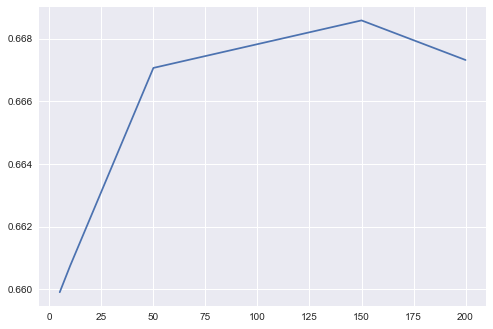

In [84]:
gbcvacc = gbcv.cv_results_["mean_test_score"]
gbne = [5,10,50,150,200]

plt.plot(gbne, gbcvacc)

**As seen above, we obtain the highest accuracy of 0.669 when the number of estimators i.e. number of boosting stages performed is 150.**

We now calculate the accuracy with test data for our chosen Gradient Boosting classification model.

In [85]:
best_gb = gbcv.best_estimator_

gb_acc = best_gb.score(X_test, y_test)
gb_acc

0.6722802290333446

## Result Analysis

We will first print all the test accuracies below

In [86]:
print("Decision Tree     :\t", dt_acc)
print("Random Forests    :\t", rf_acc)
print("Gradient Boosting :\t", gb_acc)

Decision Tree     :	 0.6672280229033345
Random Forests    :	 0.6739642977433479
Gradient Boosting :	 0.6722802290333446


From the results obtained above, we can confidently say that using the chosen Random Forest model will give the best possible accuracy.  

The commonly stated disadvantages for Random Forests is that it is hard to interpret and computationally more demanding. In terms on interpretation, decision trees are said to be the best but this doesn't hold true for our dataset as seen above due to the presence of categorical features which in turn need to be encoded resulting in a large number of features. So, this drawback exists for all of our methods.  
In terms of computational requirement, we look at the `mean_fit_time` in our cross validation results, obtained approximately as 0.045 secs, 2.5 secs and 12.7 sec respectively for our best models in each algorithm. Gradient Boosting takes the longest but has lower accuracy than our Random Forests which takes nearly 10 seconds less to run. Hence, computation time has proven to be an advantage for Radnom Forests rather than a disadvantage.

**Hence, Random Forests with 200 trees grown at maximum depth of 10 is our best overall model for Covid-16 dataset.**

## Naives Bayes Classifier

For this part, we will use 2 approaches:
- **Gaussian Naive Bayes** with the proceesed dataset used in ensemble methods. One extra operation iss converting our response variable "Outcome" into numeric categorical as well.
- **Categorical Naive Bayes** algorithm by converting the entire dataset into categorical type. For this, "Age" is transformed from ordinal categorical type. We then need to label encode Gender, City, Outbreak related, Case Acquisition information and Outcome variables. Also, we will drop the Latitude and Longitude columns as they serve the exact same purpose as the City variable when encoded.

### Gaussian NB

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, roc_auc_score

We look at 3 performance metrics here: accuracy, precision and AUC (area under ROC curve).  

In [146]:
tempy_train = y_train
tempy_test = y_test
tempy_train = tempy_train.astype("category").replace({"Fatal":1, "Not Resolved":2, "Resolved":3})
tempy_test = tempy_test.astype("category").replace({"Fatal":1, "Not Resolved":2, "Resolved":3})

In [147]:
nbayes = GaussianNB()
nbparam = {"var_smoothing":[1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}
scorers = {"accuracy": make_scorer(accuracy_score),
           "precision": make_scorer(precision_score, average = 'macro'),
           "roc_auc":make_scorer(roc_auc_score, average='macro', multi_class="ovo", needs_proba=True),}

nbcv = GridSearchCV(nbayes, param_grid=nbparam, cv=10, scoring=scorers, refit="accuracy")
nbcv.fit(X_train,tempy_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-05, 0.001, 0.1]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=macro),
                      'roc_auc': make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovo)})

In [148]:
nbcv.cv_results_

{'mean_fit_time': array([0.03819211, 0.04128675, 0.04151714, 0.04175203, 0.04620843]),
 'std_fit_time': array([0.01213243, 0.00810634, 0.00698787, 0.00720221, 0.00584826]),
 'mean_score_time': array([0.02975869, 0.02431755, 0.02332978, 0.02730327, 0.02355552]),
 'std_score_time': array([0.0035777 , 0.00565472, 0.00723261, 0.00503444, 0.0037946 ]),
 'param_var_smoothing': masked_array(data=[1e-10, 1e-09, 1e-05, 0.001, 0.1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'var_smoothing': 1e-10},
  {'var_smoothing': 1e-09},
  {'var_smoothing': 1e-05},
  {'var_smoothing': 0.001},
  {'var_smoothing': 0.1}],
 'split0_test_accuracy': array([0.34343434, 0.36111111, 0.57323232, 0.61026936, 0.65740741]),
 'split1_test_accuracy': array([0.36279461, 0.40656566, 0.5462963 , 0.58249158, 0.62121212]),
 'split2_test_accuracy': array([0.38131313, 0.42676768, 0.56481481, 0.61700337, 0.6489899 ]),
 'split3_test_accuracy': array([0.

In [149]:
nbcv.best_params_

{'var_smoothing': 0.1}

Text(0.5, 1.0, 'AUC')

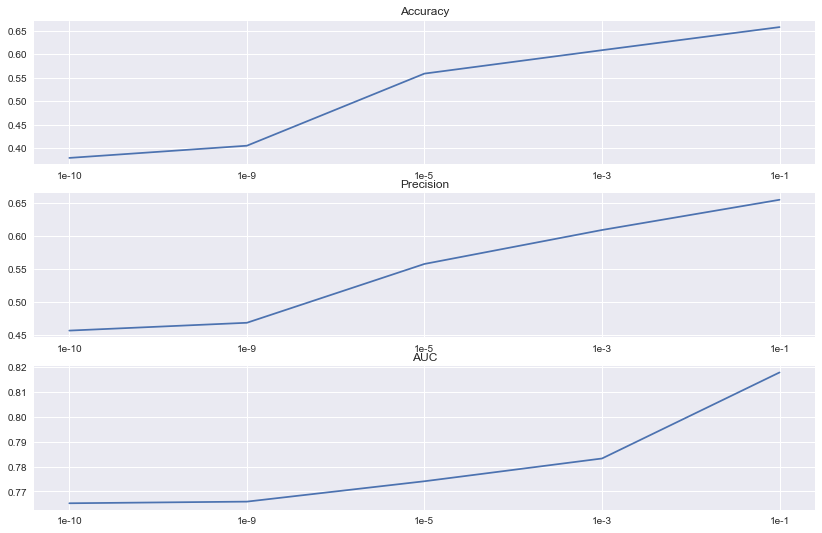

In [164]:
nbacc = nbcv.cv_results_["mean_test_accuracy"]
nbpre = nbcv.cv_results_["mean_test_precision"]
nbrec = nbcv.cv_results_["mean_test_roc_auc"]
nbvar_str = ["1e-10", "1e-9", "1e-5", "1e-3", "1e-1"]

fig, (c1, c2, c3) = plt.subplots(3,1,figsize=(14,9))

c1.plot(nbvar_str, nbacc)
c1.set_title("Accuracy")
c2.plot(nbvar_str, nbpre)
c2.set_title("Precision")
c3.plot(nbvar_str, nbrec)
c3.set_title("AUC")

For all 3 metrics, the standard rule is that higher the metric, better is the model performance. We can clearly observe that `var_smoothing = 0.1` has the highest accuracy, precision as well as AUC.  
**Hence, the best Naives Bayes model for our dataset is the one with `var_smoothing = 0.1`**

We now calculate the accuracy with the test dataset.

In [165]:
best_nb = nbcv.best_estimator_

nb_acc = best_nb.score(X_test, tempy_test)
nb_prec = precision_score(tempy_test, best_nb.predict(X_test), average="macro")
nb_auc = roc_auc_score(tempy_test, best_nb.predict_proba(X_test), average="macro", multi_class="ovo")

print(nb_acc, "\t", nb_prec, "\t", nb_auc)

0.6544291007073089 	 0.6537976420614452 	 0.8152560750722718


We get lower accuracy than our basic Decision Tree model. We will discuss why this might be the case in CM6

#### `var_smoothing` effect:

According to Scikit-Learn's codebase for Naive Bayes, `var_smoothing` is used for the following reason
```python
# If the ratio of data variance between dimensions is too small, it
# will cause numerical errors. To address this, we artificially
# boost the variance by epsilon, a small fraction of the standard
# deviation of the largest dimension. [1]
```

We assume that the data passed to our Naives Bayes classifier is Gaussian, meaning more weight is given to the samples that our closer to the mean, and i.i.d, meaning they are independent to each other. This might not be true for all datasets and taking such an assumption might result in either some test samples that are towards the extremes not being recognised or features that are heavily correlated being taken as independent. To reduce the effect of this problem, we use smoothing, which essentially increases the variance of the data as a factor of the standard deviation. This factor is controlled by the `var_smoothing` parameter. Greater is the value of the parameter, more is the smoothing effect i.e. the assumed Gaussian distribution is getting heavier near its tails. 

For our dataset, the ideal parameter obtained is the highest taken and it would be safe to assume by looking at the plots that higher values than the ones taken will give even better performance. This comes as no suprise as we know that none of our variables even remotely resume a Gaussian distribution and due to the use of one hot encoding, more than half of the features are correlated with each other. Hence, higher smoothing is necessary for even getting adequate levels of performnace using this method

### Categorical NB

In [166]:
cnb_df = covid_df
cnb_df.dtypes

Age          category
Gender       category
CAInfo       category
City         category
Outbreak     category
Latitude      float64
Longitude     float64
Outcome1     category
dtype: object

In [167]:
cnb_df["Age"] = cnb_df["Age"].astype("category")
cnb_df = cnb_df.drop(columns=["Latitude", "Longitude"])
cnb_df.dtypes

Age         category
Gender      category
CAInfo      category
City        category
Outbreak    category
Outcome1    category
dtype: object

In [168]:
from sklearn.preprocessing import LabelEncoder

le_gen = LabelEncoder()
le_ca = LabelEncoder()
le_city = LabelEncoder()
le_out = LabelEncoder()
le_y = LabelEncoder()

cnb_df["Gender"] = le_gen.fit_transform(cnb_df["Gender"])
cnb_df["CAInfo"] = le_ca.fit_transform(cnb_df["CAInfo"])
cnb_df["City"] = le_city.fit_transform(cnb_df["City"])
cnb_df["Outbreak"] = le_out.fit_transform(cnb_df["Outbreak"])
cnb_df["Outcome1"] = le_y.fit_transform(cnb_df["Outcome1"])

In [170]:
cnb_df.head()

,Age,Gender,CAInfo,City,Outbreak,Outcome1
0,5.0,2,2,15,0,2
1,2.0,0,0,6,0,1
2,9.0,0,3,0,1,2
3,2.0,0,1,30,0,2
4,9.0,0,3,16,1,0


In [171]:
cnb_df.dtypes

Age         category
Gender         int32
CAInfo         int32
City           int32
Outbreak       int32
Outcome1       int32
dtype: object

In [172]:
cnb_df["Gender"] = cnb_df["Gender"].astype("category")
cnb_df["City"] = cnb_df["City"].astype("category")
cnb_df["CAInfo"] = cnb_df["CAInfo"].astype("category")
cnb_df["Outbreak"] = cnb_df["Outbreak"].astype("category")
cnb_df["Outcome1"] = cnb_df["Outcome1"].astype("category")
cnb_df.dtypes

Age         category
Gender      category
CAInfo      category
City        category
Outbreak    category
Outcome1    category
dtype: object

In [173]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, roc_auc_score

We look at 3 performance metrics here: accuracy, precision and AUC (area under ROC curve).

In [174]:
cnbX = cnb_df[["Age", "Gender", "CAInfo", "City", "Outbreak"]]
cnby = cnb_df["Outcome1"]

cnbX_train, cnbX_test, cnby_train, cnby_test = train_test_split(cnbX, cnby, test_size=0.2, random_state=0)

Here, the parameter for smoothing is named `alpha` instead of `var_smoothing`.

In [175]:
cbayes = CategoricalNB()
cbparam = {"alpha":[1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}
scorers = {"accuracy": make_scorer(accuracy_score),
           "precision": make_scorer(precision_score, average = 'macro'),
           "roc_auc":make_scorer(roc_auc_score, average='macro', multi_class="ovo", needs_proba=True),}

cbcv = GridSearchCV(cbayes, param_grid=cbparam, cv=10, scoring=scorers, refit="roc_auc")
cbcv.fit(cnbX_train,cnby_train)

GridSearchCV(cv=10, estimator=CategoricalNB(),
             param_grid={'alpha': [1e-10, 1e-09, 1e-05, 0.001, 0.1]},
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=macro),
                      'roc_auc': make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovo)})

In [176]:
cbcv.cv_results_

{'mean_fit_time': array([0.01863608, 0.0170933 , 0.02052269, 0.01596372, 0.02322283]),
 'std_fit_time': array([0.00706868, 0.00288787, 0.00706654, 0.00067843, 0.00739414]),
 'mean_score_time': array([0.02432978, 0.02428613, 0.02388663, 0.02701328, 0.02268994]),
 'std_score_time': array([0.00708887, 0.00791634, 0.00712889, 0.00719845, 0.00734328]),
 'param_alpha': masked_array(data=[1e-10, 1e-09, 1e-05, 0.001, 0.1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-10},
  {'alpha': 1e-09},
  {'alpha': 1e-05},
  {'alpha': 0.001},
  {'alpha': 0.1}],
 'split0_test_accuracy': array([0.63468013, 0.63468013, 0.63468013, 0.63468013, 0.63468013]),
 'split1_test_accuracy': array([0.60774411, 0.60774411, 0.60774411, 0.60774411, 0.60774411]),
 'split2_test_accuracy': array([0.63468013, 0.63468013, 0.63468013, 0.63468013, 0.63468013]),
 'split3_test_accuracy': array([0.64057239, 0.64057239, 0.64057239, 0.64057239, 0.

In [177]:
cbcv.best_params_

{'alpha': 0.1}

In the above model fitting, we choose AUC as our preferred metric for choosing the best parameter as the accuracy and precision are very similar in all cases

Text(0.5, 1.0, 'AUC')

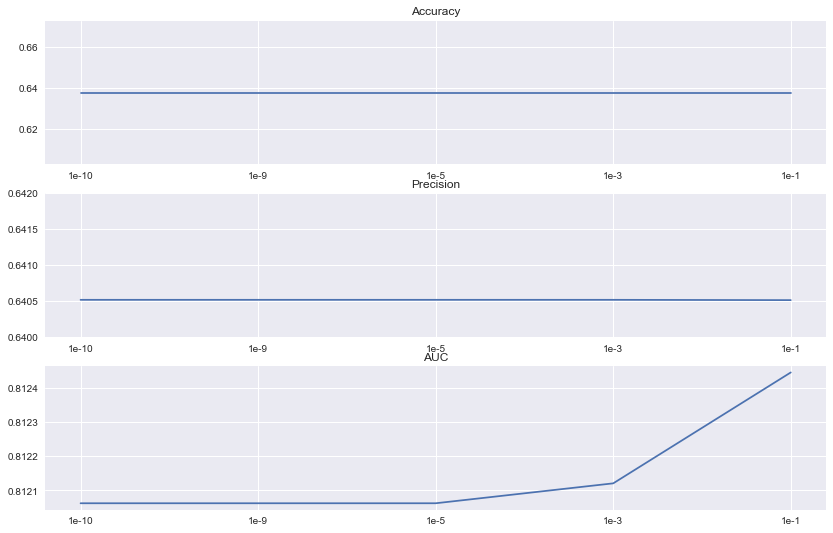

In [182]:
cbacc = cbcv.cv_results_["mean_test_accuracy"]
cbpre = cbcv.cv_results_["mean_test_precision"]
cbrec = cbcv.cv_results_["mean_test_roc_auc"]

fig, (d1, d2, d3) = plt.subplots(3,1,figsize=(14,9))

d1.plot(nbvar_str, cbacc)
d1.set_title("Accuracy")
d2.plot(nbvar_str, cbpre)
d2.set_title("Precision")
d2.set_ylim(0.64, 0.642) #behaving weirdly if this was not set
d3.plot(nbvar_str, cbrec)
d3.set_title("AUC")

For all 3 metrics, the standard rule is that higher the metric, better is the model performance. At `alpha = 0.1`, precision is a little less as seen from the values in `cv_results_` but it has the highest AUC.    
**Hence, the best Categorical Naives Bayes model for our dataset is the one with `var_smoothing = 0.1`**

We now calculate the accuracy with the test dataset.

In [184]:
best_cb = cbcv.best_estimator_

cb_acc = best_cb.score(cnbX_test, cnby_test)
cb_prec = precision_score(cnby_test, best_cb.predict(cnbX_test), average="macro")
cb_auc = roc_auc_score(cnby_test, best_cb.predict_proba(cnbX_test), average="macro", multi_class="ovo")

print(cb_acc, "\t", cb_prec, "\t", cb_auc)

0.6321993937352643 	 0.6365295001260923 	 0.8119082587952162


We get lower accuracy than our basic Decision Tree model. It is also important to note that all 3 metrics are lower than that of the Gaussian Naive Bayes model

#### `alpha` effect:

According to Scikit-Learn's codebase for Naive Bayes, `alpha` is defined as [2]
```python
"""
alpha : float, default=1.0
        Additive (Laplace/Lidstone) smoothing parameter
        (0 for no smoothing).
"""
```

The value of `alpha` conntrols the smoothing of our categorical variables i.e. it has an effect on the posterior distribution assumed for all of our features. Higher its value, greater is the smoothing effect. It was developed by Laplace when he tried to estimate the chance that the sun will rise tomorrow. His rationale was that even given a large sample of days with the rising sun, we still can not be completely sure that the sun will still rise tomorrow [3]. A non-zero alpha value ensures that none of the posterior probabilities are considered zero i.e. there is always a chance of the specified event occuring even if it hasn't occured before.

For our dataset, the ideal parameter obtained is the highest taken but only due to the increase in AUC while both accuracy and precision remain more or less constant. (I was unfortunately not able to come to perfect conclusion of why this happened)

#### References:
[1] https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/naive_bayes.py  
[2] https://github.com/scikit-learn/scikit-learn/blob/95119c13a/sklearn/naive_bayes.py#L1054  
[3] https://en.wikipedia.org/wiki/Additive_smoothing#cite_note-lec5-4

### Final observations:
When compared to Decision Tree model, both our Naive Bayes models have a lower test accuracy. A possible reason is that it is a consequence of the assuming the data is i.i.d. (identically and independently distributed). A preliminary look at any subset of our features in the given dataset will show that this assumption is wrong and most likely the cause of the lower accuracy when compared to our Tree methods, which by nature of being non-parametric are not built on any assumptions about the distribution of data. The linearity in Naive Bayes can also be said to be a factor for lower accuracy but proving that requires comparison with more robust linear methods or mathematical reasoning that I am unfortunately unaware of. 